In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv


--2024-11-18 14:42:39--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  --.-KB/s    in 0.1s    

2024-11-18 14:42:39 (113 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2024-11-18 14:42:39--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting 

In [ ]:
goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

# איחוד הקבצים
combined_df = pd.concat([goemotions_1, goemotions_2, goemotions_3], ignore_index=True)
emotion_columns = combined_df.columns[9:]
# שמירה לקובץ חדש
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s', errors='coerce')
combined_df.to_csv('data/full_dataset/goemotions_combined.csv', index=False)

In [ ]:
(combined_df['created_utc'].min(),combined_df['created_utc'].max())

(Timestamp('2019-01-01 00:00:19'), Timestamp('2019-01-31 23:59:36'))

Frequency of comments by day of the week:
day_of_week
0    27295
1    34716
2    35196
3    35772
4    27793
5    25557
6    24896
Name: author, dtype: int64

Frequency of comments by hour of the day:
hour_of_day
0     10894
1     11543
2     11703
3     10623
4      9438
5      7919
6      6428
7      5268
8      4690
9      4291
10     4235
11     4504
12     5483
13     6689
14     8178
15     9663
16    10715
17    11099
18    11708
19    11417
20    11890
21    11481
22    10886
23    10480
Name: author, dtype: int64

Frequency of comments by day of the month:
day_of_month
1     5735
2     6324
3     6767
4     6609
5     6481
6     6682
7     7267
8     6856
9     7210
10    7060
11    6844
12    6437
13    6280
14    6571
15    7307
16    7203
17    7280
18    7180
19    6165
20    6321
21    6801
22    7321
23    7079
24    7398
25    7160
26    6474
27    5613
28    6656
29    7497
30    7380
31    7267
Name: author, dtype: int64


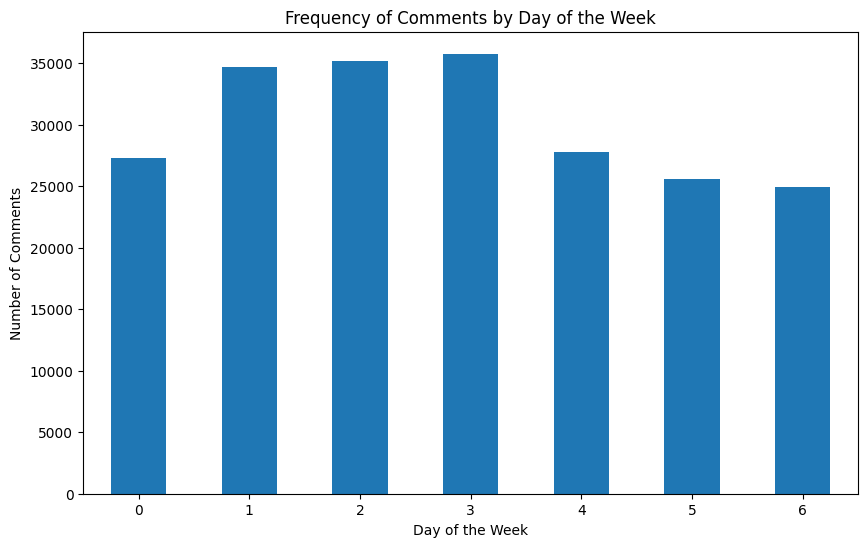

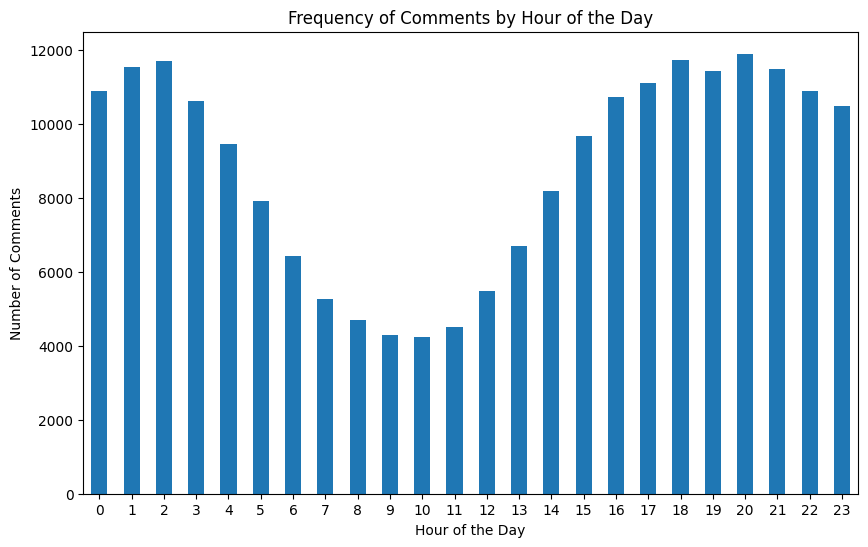

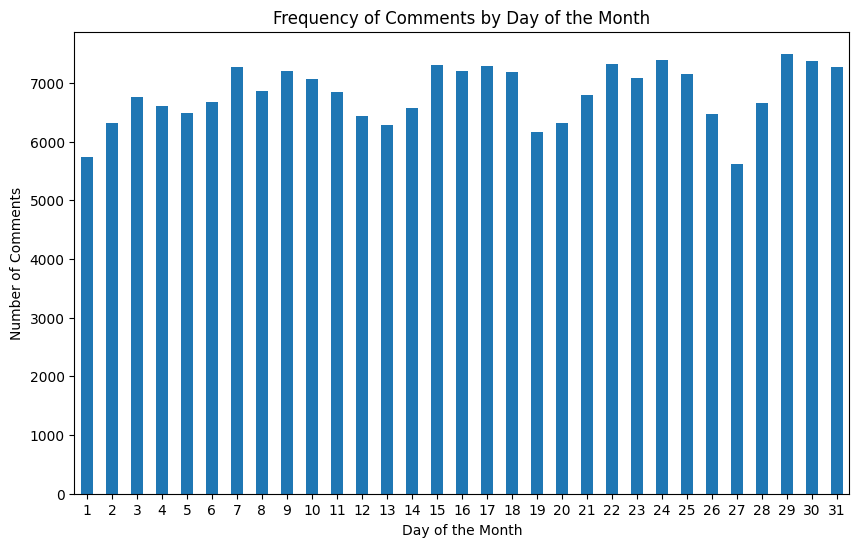

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'created_utc' column to datetime format (if not already in datetime format)
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s')

# Extract day of the week (0 = Sunday, 6 = Saturday)
combined_df['day_of_week'] = combined_df['created_utc'].dt.dayofweek

# Extract hour of the day (0-23)
combined_df['hour_of_day'] = combined_df['created_utc'].dt.hour

# Calculate the frequency of comments for each day of the week
day_of_week_frequency = combined_df.groupby('day_of_week')['author'].count()

# Calculate the frequency of comments for each hour of the day
hour_of_day_frequency = combined_df.groupby('hour_of_day')['author'].count()

combined_df['day_of_month'] = combined_df['created_utc'].dt.day

# Calculate the frequency of comments for each day of the month
day_of_month_frequency = combined_df.groupby('day_of_month')['author'].count()
# Display the results
print("Frequency of comments by day of the week:")
print(day_of_week_frequency)

print("\nFrequency of comments by hour of the day:")
print(hour_of_day_frequency)

# Display the results
print("\nFrequency of comments by day of the month:")
print(day_of_month_frequency)

# Plot frequency of comments by day of the week
plt.figure(figsize=(10, 6))
day_of_week_frequency.plot(kind='bar')
plt.title("Frequency of Comments by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

# Plot frequency of comments by hour of the day
plt.figure(figsize=(10, 6))
hour_of_day_frequency.plot(kind='bar')
plt.title("Frequency of Comments by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()


plt.figure(figsize=(10, 6))
day_of_month_frequency.plot(kind='bar')
plt.title("Frequency of Comments by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

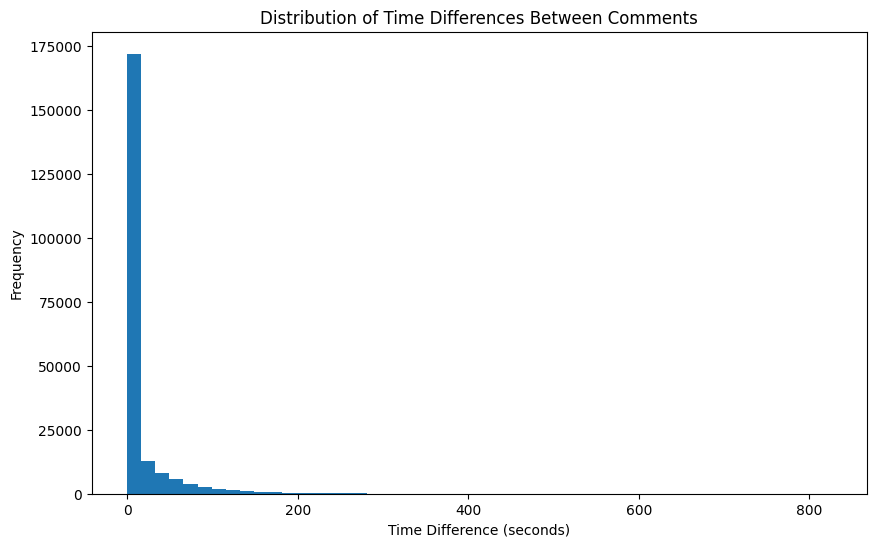

In [ ]:
combined_df = combined_df.sort_values(by='created_utc')

# Calculate the time difference between each comment and the previous one
combined_df['time_diff'] = combined_df['created_utc'].diff()

# You can also filter the time difference to remove NaT (Not a Time) values
combined_df = combined_df.dropna(subset=['time_diff'])

# Plot distribution of time differences
plt.figure(figsize=(10, 6))
combined_df['time_diff'].dt.total_seconds().plot(kind='hist', bins=50)
plt.title("Distribution of Time Differences Between Comments")
plt.xlabel("Time Difference (seconds)")
plt.ylabel("Frequency")
plt.show()

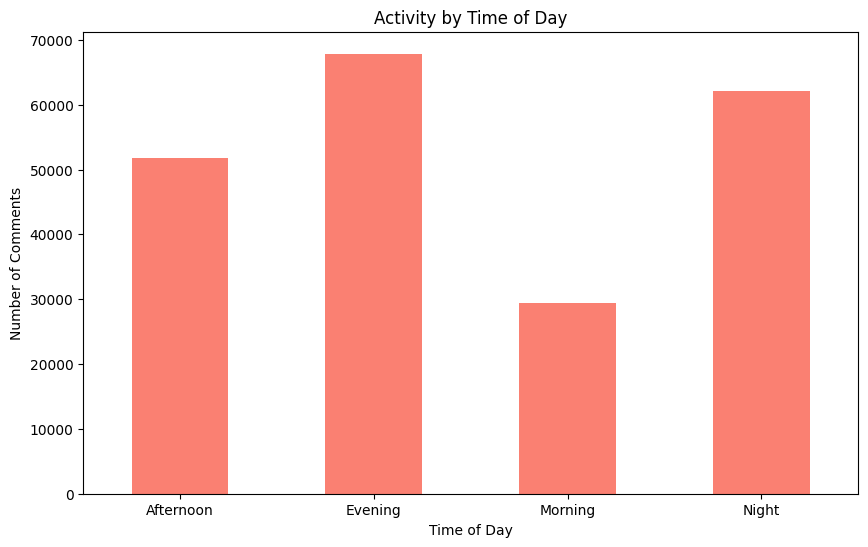

In [ ]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

combined_df['time_of_day'] = combined_df['hour_of_day'].apply(categorize_time_of_day)

# Count frequency by time of day
time_of_day_frequency = combined_df.groupby('time_of_day')['author'].count()

# Plot the frequency of comments by time of day
plt.figure(figsize=(10, 6))
time_of_day_frequency.plot(kind='bar', color='salmon')
plt.title("Activity by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()


<Figure size 2400x1200 with 0 Axes>

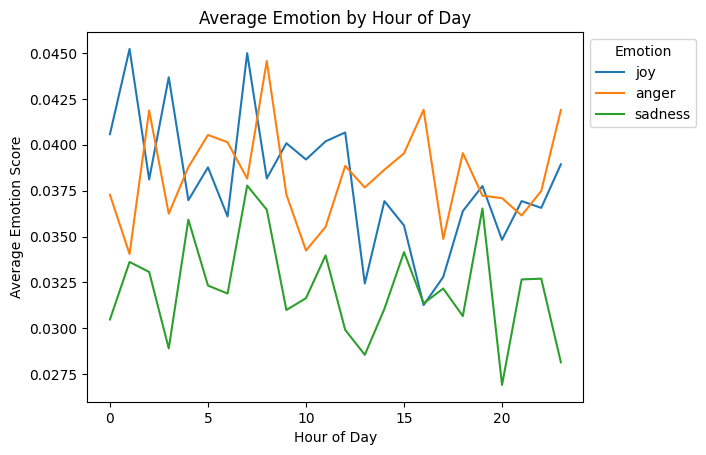

In [ ]:
import matplotlib.pyplot as plt

def plot_average_emotion_by_hour(combined_df, emotion_columns):
    """
    Plots the average emotion scores for each hour of the day for the given emotions.

    Parameters:
    - combined_df: The DataFrame containing the data.
    - emotion_columns: A list of columns representing the emotions to analyze.

    Returns:
    - A plot showing the average emotion scores per hour of the day.
    """
    # Group by hour of day and calculate the average of the selected emotions
    hourly_emotion_avg = combined_df.groupby('hour_of_day')[emotion_columns].mean()

    # Plot the results
    plt.figure(figsize=(24, 12))
    hourly_emotion_avg.plot(kind='line')
    plt.title("Average Emotion by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Emotion Score")
    plt.legend(title="Emotion", loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Example usage:
emotion_columns = ['joy', 'anger', 'sadness']  # Replace with actual emotion columns you want to plot
plot_average_emotion_by_hour(combined_df, emotion_columns)

The analyze_emotion_over_time function analyzes the distribution of a specific emotion over time in a dataset. It provides insights into how the emotion is distributed across different times of the day, days of the week, and days of the month. It plots bar charts to visualize the frequency of the emotion in each of these time periods.

Time Segmentation Explanation:
Time of Day: The day is divided into four segments:

Morning: From 6 AM to 12 PM
Noon: From 12 PM to 6 PM
Evening: From 6 PM to 12 AM
Night: From 12 AM to 6 AM
The emotion is analyzed in terms of how it appears during these parts of the day.

Day of Week: The dataset is grouped by days of the week (from 0 to 6, where 0 represents Sunday and 6 represents Saturday), and the frequency of the emotion for each day is plotted.

Day of Month: The function also groups the data by the specific day of the month, allowing you to see how the emotion is distributed across the days in a given month.

<ipython-input-31-35dceb361b35>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['time_of_day'] = emotion_data['created_utc'].dt.hour.apply(time_of_day)
<ipython-input-31-35dceb361b35>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['day_of_week'] = emotion_data['created_utc'].dt.dayofweek
<ipython-input-31-35dceb361b35>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

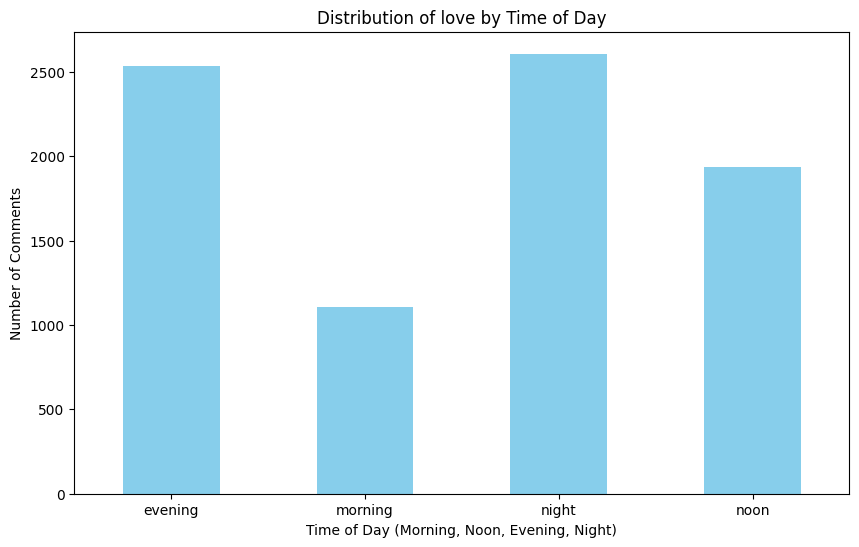

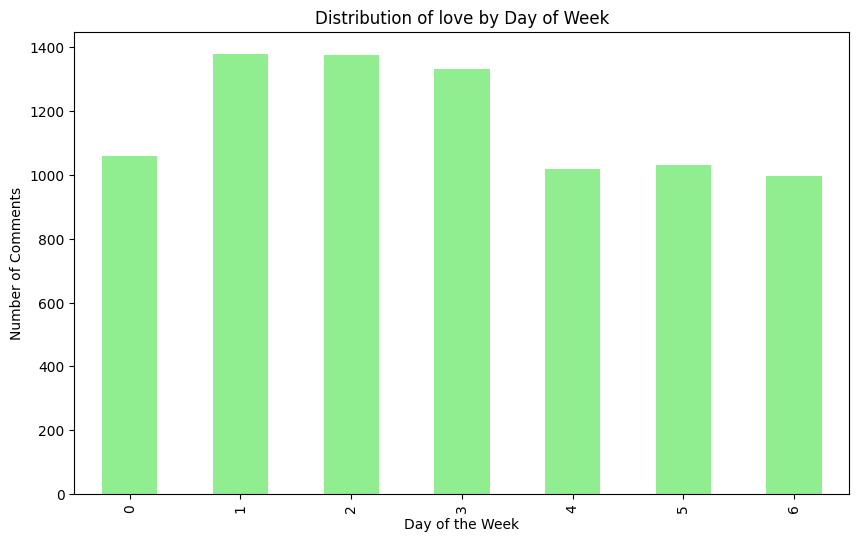

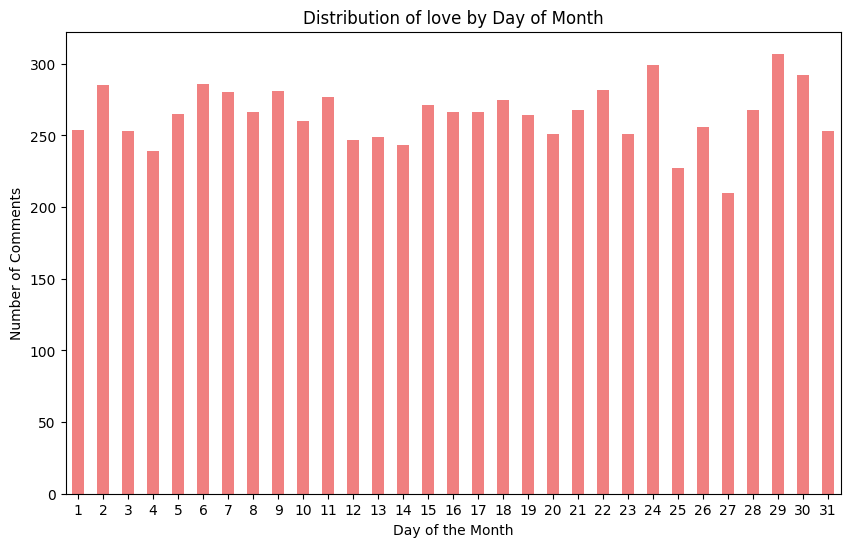

In [ ]:
import matplotlib.pyplot as plt

def analyze_emotion_over_time(combined_df, emotion_column):

    emotion_data = combined_df[combined_df[emotion_column] == 1]

    def time_of_day(hour):
        if 6 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 18:
            return 'noon'
        elif 18 <= hour < 24:
            return 'evening'
        else:
            return 'night'

    emotion_data['time_of_day'] = emotion_data['created_utc'].dt.hour.apply(time_of_day)

    time_of_day_frequency = emotion_data.groupby('time_of_day')['author'].count()

    emotion_data['day_of_week'] = emotion_data['created_utc'].dt.dayofweek
    day_of_week_frequency = emotion_data.groupby('day_of_week')['author'].count()

    emotion_data['day_of_month'] = emotion_data['created_utc'].dt.day
    day_of_month_frequency = emotion_data.groupby('day_of_month')['author'].count()

    plt.figure(figsize=(10, 6))
    time_of_day_frequency.plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {emotion_column} by Time of Day")
    plt.xlabel("Time of Day (Morning, Noon, Evening, Night)")
    plt.ylabel("Number of Comments")
    plt.xticks(rotation=0)
    plt.show()

    plt.figure(figsize=(10, 6))
    day_of_week_frequency.plot(kind='bar', color='lightgreen')
    plt.title(f"Distribution of {emotion_column} by Day of Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Comments")
    plt.show()

    plt.figure(figsize=(10, 6))
    day_of_month_frequency.plot(kind='bar', color='lightcoral')
    plt.title(f"Distribution of {emotion_column} by Day of Month")
    plt.xlabel("Day of the Month")
    plt.ylabel("Number of Comments")
    plt.xticks(rotation=0)
    plt.show()

emotion_column = 'love'
analyze_emotion_over_time(combined_df, emotion_column)

